In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install jupyter_http_over_ws

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.rand(10000, 256, device=device)
    y = x.to(device)
    print(x[0:5, 0:5])
    print(y.to("cpu", torch.double)[0:5, 0:5])
else:
    print('not available')

tensor([[0.8063, 0.6482, 0.4550, 0.0366, 0.5407],
        [0.5888, 0.6803, 0.0283, 0.4094, 0.6532],
        [0.3677, 0.5915, 0.6783, 0.1316, 0.8628],
        [0.9086, 0.6306, 0.4689, 0.6682, 0.3665],
        [0.2177, 0.4963, 0.0710, 0.9057, 0.2853]], device='cuda:0')
tensor([[0.8063, 0.6482, 0.4550, 0.0366, 0.5407],
        [0.5888, 0.6803, 0.0283, 0.4094, 0.6532],
        [0.3677, 0.5915, 0.6783, 0.1316, 0.8628],
        [0.9086, 0.6306, 0.4689, 0.6682, 0.3665],
        [0.2177, 0.4963, 0.0710, 0.9057, 0.2853]], dtype=torch.float64)


In [9]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8131724310979542932
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5156962304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9985794912029875543
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:23:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [10]:
# Import TensorFlow into Colab

import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.version)
print("TF Hub version:", hub.version)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: <module 'tensorflow._api.v2.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
TF Hub version: <module 'tensorflow_hub.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_hub\\version.py'>
GPU available (YESSSS!!!!!)


In [11]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
import torch
torch.cuda.is_available()

True

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#!pip install seaborn
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib.ticker import LinearLocator
import statsmodels.formula.api as sm
#!pip install xgboost
from matplotlib import pyplot
import xgboost as xgb
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import requests as rq
import cufflinks as cf

In [5]:
resp = rq.get('https://api.cryptowat.ch/exchanges')

In [6]:
# Get list of exchange values you can use
exchange_names = [e['symbol'] for e in resp.json()['result'] \
    if e['active']]
exchange_names

['cme',
 'kraken',
 'huobi',
 'poloniex',
 'zonda',
 'binance-us',
 'kraken-futures',
 'uniswap-v2',
 'comex',
 'coinbase-pro',
 'liquid',
 'bisq',
 'bithumb',
 'deribit',
 'bitfinex',
 'gemini',
 'bitmex',
 'luno',
 'bittrex',
 'okex',
 'nymex',
 'ftx-us',
 'cexio',
 'bitflyer',
 'coinone',
 'hitbtc',
 'gateio',
 'okcoin',
 'ftx',
 'bitstamp',
 'binance']

In [7]:
# Select Gemini
EXCHANGE = 'binance'
# Fetch markets on the exchange
exchange_resp = rq.get(f'https://api.cryptowat.ch/markets/{EXCHANGE}')

In [8]:
# See all the pairs in the market
pairs = [i['pair'] for i in exchange_resp.json()['result'] \
    if i['active']]
pairs

['btcusdt',
 'ethbtc',
 'ltcbtc',
 'neobtc',
 'qtumeth',
 'eoseth',
 'snteth',
 'gasbtc',
 'ethusdt',
 'qtumbtc',
 'omgbtc',
 'omgeth',
 'zrxbtc',
 'zrxeth',
 'funeth',
 'neoeth',
 'xvgbtc',
 'eosbtc',
 'sntbtc',
 'etceth',
 'etcbtc',
 'zecbtc',
 'zeceth',
 'dashbtc',
 'dasheth',
 'btgbtc',
 'trxbtc',
 'trxeth',
 'xrpbtc',
 'xrpeth',
 'storjbtc',
 'xmrbtc',
 'xmreth',
 'batbtc',
 'bateth',
 'neousdt',
 'btsbtc',
 'lskbtc',
 'lsketh',
 'adabtc',
 'adaeth',
 'ltceth',
 'ltcusdt',
 'elfbtc',
 'elfeth',
 'navbtc',
 'icxbtc',
 'icxeth',
 'steembtc',
 'steemeth',
 'iotabtc',
 'rlcbtc',
 'rlceth',
 'xlmbtc',
 'bnteth',
 'lrcbtc',
 'lrceth',
 'bntbtc',
 'powrbtc',
 'powreth',
 'arkbtc',
 'kmdbtc',
 'xlmeth',
 'wavesbtc',
 'waveseth',
 'pivxbtc',
 'manabtc',
 'manaeth',
 'linkbtc',
 'linketh',
 'xembtc',
 'xemeth',
 'sysbtc',
 'reqbtc',
 'nanobtc',
 'nanoeth',
 'adxeth',
 'dntbtc',
 'adxbtc',
 'grsbtc',
 'adausdt',
 'xvgeth',
 'xrpusdt',
 'kncbtc',
 'knceth',
 'repbtc',
 'repeth',
 'zilbtc',
 '

In [9]:
PAIR = 'nearusdt'
# Verify Pair exists
pair_resp = rq.get(f'https://api.cryptowat.ch/pairs/{PAIR}')
print(type(pair_resp.json()))
df = pd.DataFrame(pair_resp.json())

<class 'dict'>


In [10]:
# Date Parameters
START_DATE = '1/18/2020'
END_DATE = '1/16/2022'
PERIOD = 3600  # Time period in seconds (e.g., 1 day = 86400)

In [11]:
from datetime import datetime
def to_timestamp(dateString):
    element = datetime.strptime(dateString, '%m/%d/%Y')
    return int(datetime.timestamp(element))
# Will be used later to convert back
def to_date(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt.strftime('%m/%d/%Y')
start_ts = to_timestamp(START_DATE)
end_ts = to_timestamp(END_DATE)

In [12]:
# Fetch the data
params = {
  'after': start_ts,
  'before': end_ts,
  'periods': PERIOD,
}
ohlc_resp = rq.get(
    f'https://api.cryptowat.ch/markets/{EXCHANGE}/{PAIR}/ohlc',
    params=params)
ohlc_resp.json()['result'][f'{PERIOD}']

[[1620849600, 5.3966, 5.5041, 5.2838, 5.4997, 461208.06, 2489043.457224],
 [1620853200, 5.4965, 5.5043, 5.3664, 5.4791, 375256.92, 2046677.86477],
 [1620856800, 5.4799, 5.5, 5.4239, 5.4392, 203154.54, 1110984.352897],
 [1620860400, 5.4398, 5.485, 5.1711, 5.3688, 661110.2, 3498449.718255],
 [1620864000, 5.37, 5.3727, 4.604, 4.7424, 1228900.22, 6169869.123292],
 [1620867600, 4.7683, 5.2179, 4.51, 5.0337, 1798152.88, 8826247.9158],
 [1620871200, 5.0348, 5.2005, 4.9807, 5.1311, 570033.25, 2922785.677075],
 [1620874800, 5.129, 5.2549, 5.0654, 5.2349, 452480.32, 2329187.953898],
 [1620878400, 5.2318, 5.2343, 5.0963, 5.1858, 388533.28, 2000001.246686],
 [1620882000, 5.184, 5.246, 5.1, 5.1432, 448432.71, 2320336.501846],
 [1620885600, 5.143, 5.2548, 5.1424, 5.2058, 288623.2, 1504280.338629],
 [1620889200, 5.2057, 5.4471, 5.1976, 5.4268, 873528.12, 4671347.593797],
 [1620892800, 5.4266, 5.4318, 5.2637, 5.27, 540352.01, 2888662.428637],
 [1620896400, 5.2687, 5.33, 5.095, 5.096, 545442.35, 284619

In [13]:
import json
import pprint as pp
class Ohlc():
    def __init__(self, tuple):
        (self.close_ts,
         self.open,
         self.high,
         self.low,
         self.close,
         self.volume,
         self.quote_volume) = tuple
        self.close_dt = to_date(self.close_ts)
    def __repr__(self):
        return pp.pformat({
            'close_dt': self.close_ts,
            'price': {
              'open': self.open,
              'high': self.high,
              'low': self.low,
              'close': self.close,
            },
        })

In [14]:
ohlcs = [Ohlc(i) for i in ohlc_resp.json()['result'][f'{PERIOD}']]
ohlcs

[{'close_dt': 1620849600,
  'price': {'close': 5.4997, 'high': 5.5041, 'low': 5.2838, 'open': 5.3966}},
 {'close_dt': 1620853200,
  'price': {'close': 5.4791, 'high': 5.5043, 'low': 5.3664, 'open': 5.4965}},
 {'close_dt': 1620856800,
  'price': {'close': 5.4392, 'high': 5.5, 'low': 5.4239, 'open': 5.4799}},
 {'close_dt': 1620860400,
  'price': {'close': 5.3688, 'high': 5.485, 'low': 5.1711, 'open': 5.4398}},
 {'close_dt': 1620864000,
  'price': {'close': 4.7424, 'high': 5.3727, 'low': 4.604, 'open': 5.37}},
 {'close_dt': 1620867600,
  'price': {'close': 5.0337, 'high': 5.2179, 'low': 4.51, 'open': 4.7683}},
 {'close_dt': 1620871200,
  'price': {'close': 5.1311, 'high': 5.2005, 'low': 4.9807, 'open': 5.0348}},
 {'close_dt': 1620874800,
  'price': {'close': 5.2349, 'high': 5.2549, 'low': 5.0654, 'open': 5.129}},
 {'close_dt': 1620878400,
  'price': {'close': 5.1858, 'high': 5.2343, 'low': 5.0963, 'open': 5.2318}},
 {'close_dt': 1620882000,
  'price': {'close': 5.1432, 'high': 5.246, 'low

In [15]:
import plotly.io as pio
pio.renderers.default = "vscode"

In [16]:
# Convert timestamp to date object in each row
data = [tuple([datetime.fromtimestamp(i[0])] + i[1:]) \
    for i in ohlc_resp.json()['result'][f'{PERIOD}']]

# Create dataframe
columns = ['date', 'open', 'high', 'low','close',\
    'volume', 'qt_volume']
df = pd.DataFrame.from_records(data, columns=columns)
df.tail()

,date,open,high,low,close,volume,qt_volume
5951,2022-01-15 20:00:00,19.281,19.653,19.275,19.520,313420.6,6.110949e+06
5952,2022-01-15 21:00:00,19.504,19.573,19.252,19.260,193855.7,3.764296e+06
5953,2022-01-15 22:00:00,19.253,19.259,18.751,18.862,708648.7,1.345869e+07
5954,2022-01-15 23:00:00,18.871,19.060,18.785,18.997,339533.5,6.416801e+06
5955,2022-01-16 00:00:00,18.993,19.150,18.867,19.129,314428.1,5.970218e+06


In [38]:
cf.go_offline()
qf = cf.QuantFig(
    df, title="", name='CRV')
qf.iplot()

In [18]:
END_DATE

'1/16/2022'

In [19]:
df

,date,open,high,low,close,volume,qt_volume
0,2021-05-12 16:00:00,5.3966,5.5041,5.2838,5.4997,461208.06,2.489043e+06
1,2021-05-12 17:00:00,5.4965,5.5043,5.3664,5.4791,375256.92,2.046678e+06
2,2021-05-12 18:00:00,5.4799,5.5000,5.4239,5.4392,203154.54,1.110984e+06
3,2021-05-12 19:00:00,5.4398,5.4850,5.1711,5.3688,661110.20,3.498450e+06
4,2021-05-12 20:00:00,5.3700,5.3727,4.6040,4.7424,1228900.22,6.169869e+06
...,...,...,...,...,...,...,...
5951,2022-01-15 20:00:00,19.2810,19.6530,19.2750,19.5200,313420.60,6.110949e+06
5952,2022-01-15 21:00:00,19.5040,19.5730,19.2520,19.2600,193855.70,3.764296e+06
5953,2022-01-15 22:00:00,19.2530,19.2590,18.7510,18.8620,708648.70,1.345869e+07
5954,2022-01-15 23:00:00,18.8710,19.0600,18.7850,18.9970,339533.50,6.416801e+06


In [20]:
df.sort_values('date')

,date,open,high,low,close,volume,qt_volume
0,2021-05-12 16:00:00,5.3966,5.5041,5.2838,5.4997,461208.06,2.489043e+06
1,2021-05-12 17:00:00,5.4965,5.5043,5.3664,5.4791,375256.92,2.046678e+06
2,2021-05-12 18:00:00,5.4799,5.5000,5.4239,5.4392,203154.54,1.110984e+06
3,2021-05-12 19:00:00,5.4398,5.4850,5.1711,5.3688,661110.20,3.498450e+06
4,2021-05-12 20:00:00,5.3700,5.3727,4.6040,4.7424,1228900.22,6.169869e+06
...,...,...,...,...,...,...,...
5951,2022-01-15 20:00:00,19.2810,19.6530,19.2750,19.5200,313420.60,6.110949e+06
5952,2022-01-15 21:00:00,19.5040,19.5730,19.2520,19.2600,193855.70,3.764296e+06
5953,2022-01-15 22:00:00,19.2530,19.2590,18.7510,18.8620,708648.70,1.345869e+07
5954,2022-01-15 23:00:00,18.8710,19.0600,18.7850,18.9970,339533.50,6.416801e+06


In [21]:
for i in range(len(df)):
    df1 = df.loc[(i-36):,]
    df1['avg'] = (df1['open'] + df1['close'])/2
    sd = np.std(df1['avg'])
    mu = np.mean(df1['avg'])
    ciU = mu+1.96*sd
    ciL = mu-1.96*sd
    df.loc[i,'ci95U'] = ciU
    df.loc[i,'ci95L'] = ciL

In [22]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Candlestick(x=df['date'],
        open=df["open"],
        high=df["high"],
        low=df["low"],
        close=df["close"]),
    
])
fig.add_trace(go.Scatter(name='UpperBound', x=df['date'], y=df['ci95U']))
fig.add_trace(go.Scatter(name='LowerBound', x=df['date'], y=df['ci95L']))
fig.add_trace(go.Scatter(name='volume', x=df['date'], y=((df['volume']/np.mean(df['volume']))/7)))
# fig.add_trace(go.Scatter(name='NN', x=df['date'], y=df['pred']-3))

fig.update_layout(
    title=f"Near/USDT Candlesticks",
    yaxis_title="NEAR Price (USDT)",
)

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [34]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
training_set = df.iloc[:round(.7*(len(df))),:]
training_set = training_set.iloc[:, 1:2].values

testing_set = df.iloc[round(.7*(len(df))):,:]
testing_set = testing_set.iloc[:, 1:2].values

len(testing_set)

1787

In [25]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [26]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(600, len(training_set)):
    X_train.append(training_set_scaled[i-600:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(3569, 600)

In [27]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3569, 600, 1)

In [28]:
# Initialising the RNN
regressor = Sequential()

In [29]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [30]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [31]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [32]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [33]:
# Adding the output layer
regressor.add(Dense(units=1))

In [34]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                             patience=3)

In [37]:
# Fitting the RNN to the Training set    
regressor.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[full_model_early_stopping])

Epoch 1/100
112/112 [==============================] - 60s 538ms/step - loss: 0.0020
Epoch 2/100
112/112 [==============================] - 60s 535ms/step - loss: 0.0020
Epoch 3/100
112/112 [==============================] - 63s 566ms/step - loss: 0.0020
Epoch 4/100
112/112 [==============================] - 64s 571ms/step - loss: 0.0018
Epoch 5/100
112/112 [==============================] - 64s 575ms/step - loss: 0.0017
Epoch 6/100
112/112 [==============================] - 61s 547ms/step - loss: 0.0016
Epoch 7/100
112/112 [==============================] - 65s 576ms/step - loss: 0.0015
Epoch 8/100
112/112 [==============================] - 60s 540ms/step - loss: 0.0014
Epoch 9/100
112/112 [==============================] - 61s 540ms/step - loss: 0.0015
Epoch 10/100
112/112 [==============================] - 61s 541ms/step - loss: 0.0014
Epoch 11/100
112/112 [==============================] - 61s 542ms/step - loss: 0.0013
Epoch 12/100
112/112 [==============================] - 61s 541

In [71]:
import pickle
from joblib import dump, load

In [ ]:
dump(regressor, 'model1.pkl')

In [ ]:
model = load('mlbrain.joblib')

In [73]:
dataset_test = pd.DataFrame(testing_set)
real_stock_price = dataset_test.iloc[:20, 1:2].values

In [74]:
dataset_total = pd.concat((df.loc[:round(.7*(len(df))),'open'], dataset_test), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [75]:
testing_set.shape

(1787, 1)

In [82]:
X_test = []
testing_set_scaled = sc.fit_transform(df.iloc[:, 1:2].values)
for i in range(600,len(df)):
    X_test.append(testing_set_scaled[i-69:i, 0])
    
X_test = np.array(X_test)

print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_coin_price = sc.inverse_transform(predicted_stock_price)
predicted_coin_price

(5356, 69)


array([[ 3.0871565],
       [ 3.0888345],
       [ 3.0912313],
       ...,
       [18.364677 ],
       [18.327984 ],
       [18.277134 ]], dtype=float32)

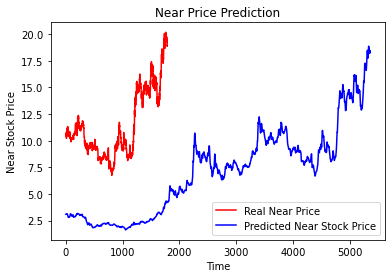

In [83]:
# Visualising the results
plt.plot(testing_set, color='red', label='Real Near Price')
plt.plot(predicted_coin_price, color='blue', label='Predicted Near Stock Price')
plt.title('Near Price Prediction')
plt.xlabel('Time')
plt.ylabel('Near Stock Price')
plt.legend()
plt.show()

In [90]:
df.head()

,date,open,high,low,close,volume,qt_volume,ci95U,ci95L,pred
0,2021-05-12 16:00:00,5.3966,5.5041,5.2838,5.4997,461208.06,2.489043e+06,15.17345,-1.261268,15.17345
1,2021-05-12 17:00:00,5.4965,5.5043,5.3664,5.4791,375256.92,2.046678e+06,15.17345,-1.261268,15.17345
2,2021-05-12 18:00:00,5.4799,5.5000,5.4239,5.4392,203154.54,1.110984e+06,15.17345,-1.261268,15.17345
3,2021-05-12 19:00:00,5.4398,5.4850,5.1711,5.3688,661110.20,3.498450e+06,15.17345,-1.261268,15.17345
4,2021-05-12 20:00:00,5.3700,5.3727,4.6040,4.7424,1228900.22,6.169869e+06,15.17345,-1.261268,15.17345
